In [61]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import functions as f

In [62]:
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Configuration yaml file not found!")

In [63]:
config['data']['raw']

{'final_demo': '../data/raw/df_final_demo.csv',
 'final_web_data_combined': '../data/raw/df_final_web_data_combined.csv',
 'final_experiment_clients': '../data/raw/df_final_experiment_clients.csv'}

In [64]:
client_profile_df = pd.read_csv(config['data']['raw']['final_demo'], low_memory=False)
client_profile_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [65]:
# Retrieving the number of rows and columns in the dataframe
client_profile_df.shape

(70609, 9)

In [66]:
# Displaying the data types of each column in the dataframe
client_profile_df.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [67]:
# Retrieving the unique data types present in the dataframe columns
list(set(client_profile_df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [68]:
# Extracting column names with numerical data types from the dataframe
client_profile_df.select_dtypes("number").columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [69]:
# Counting and sorting the unique values for each numerical column in descending order
client_profile_df.select_dtypes("number").nunique().sort_values(ascending=False)

client_id           70609
bal                 70328
clnt_tenure_mnth      482
clnt_age              165
clnt_tenure_yr         54
logons_6_mnth           9
num_accts               8
calls_6_mnth            8
dtype: int64

In [70]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
# Remember to adjust the threshold (in this case, < 20) based on your dataset's specific characteristics and domain knowledge.
potential_categorical_from_numerical = client_profile_df.select_dtypes("number").loc[:, client_profile_df.select_dtypes("number").nunique() < 10]
potential_categorical_from_numerical

,num_accts,calls_6_mnth,logons_6_mnth
0,2.0,6.0,9.0
1,2.0,6.0,9.0
2,2.0,6.0,9.0
3,2.0,3.0,6.0
4,2.0,0.0,3.0
...,...,...,...
70604,3.0,5.0,5.0
70605,2.0,6.0,6.0
70606,2.0,3.0,3.0
70607,3.0,4.0,4.0


In [71]:
client_profile_df.rename(columns = {'gendr':'gender'},inplace=True)

In [72]:
# Retrieving column names with object (typically string) data types from the dataframe
client_profile_df.select_dtypes("object").columns

Index(['gender'], dtype='object')

In [73]:
# Counting and sorting the unique values for each object (string) column in descending order
client_profile_df.select_dtypes("object").nunique().sort_values(ascending=False)

gender    4
dtype: int64

In [74]:
client_profile_df['gender'].unique()

array(['U', 'M', 'F', nan, 'X'], dtype=object)

In [75]:
# Extracting columns with object (typically string) data types to create a categorical dataframe
# For demonstration purposes, let's consider the columns in potential_categorical_from_numerical as categorical variables.
client_profile_df_categorical = pd.concat([client_profile_df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

# Adjusting the numerical dataframe by removing the moved columns
client_profile_df_numerical = client_profile_df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

In [76]:
# Verifying that the total number of columns in the dataframe is the sum of object (string) and numerical columns
len(client_profile_df.columns) == len(client_profile_df.select_dtypes("object").columns) + len(client_profile_df.select_dtypes("number").columns)

True

In [77]:
# Checking for missing data
client_profile_df.isnull().sum().sort_values(ascending=False)

clnt_age            15
clnt_tenure_yr      14
clnt_tenure_mnth    14
gender              14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
client_id            0
dtype: int64

In [78]:
# Identifying columns in the dataframe where over 80% of the values are missing
client_profile_df.columns[client_profile_df.isnull().mean() > 0.8]

Index([], dtype='object')

In [79]:
# checking Duplicates
client_profile_df.duplicated().sum()

0

In [80]:
# Dropping the null values
client_profile_df.dropna(inplace = True)

In [81]:
# Checking for missing data after dropping null values
client_profile_df.isnull().sum().sort_values(ascending=False)

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gender              0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [82]:
client_profile_df['clnt_tenure_yr'].unique()

array([ 6.,  7.,  5., 16., 12., 30., 15.,  8.,  4.,  3., 10., 11., 13.,
       14., 19., 18., 25., 23., 21., 17.,  9., 27., 24., 20., 28., 22.,
       29., 46., 26., 32., 33., 35.,  2., 38., 31., 48., 34., 36., 51.,
       47., 49., 37., 39., 40., 55., 42., 44., 43., 50., 54., 41., 45.,
       52., 62.])

In [83]:
client_profile_df['clnt_tenure_mnth'].unique()

array([ 73.,  94.,  64., 198., 145.,  71.,  66., 361., 369., 189., 100.,
        99.,  67., 193.,  58.,  47., 122., 136., 101., 103.,  70., 152.,
       160.,  80.,  88.,  86.,  65.,  68.,  93.,  85., 168., 142., 228.,
       223., 305., 286., 285., 280., 254., 253., 278., 221., 216., 212.,
       204., 260., 116., 130., 177., 159., 190.,  89.,  91., 129., 329.,
        92.,  82., 169., 239.,  69., 178.,  95.,  63., 187., 288., 261.,
       251., 250.,  56.,  60., 123., 175., 188.,  59., 336., 149., 156.,
       330., 155., 167.,  96., 242., 163.,  81., 182., 134., 113., 172.,
       120., 105., 271., 244., 200., 157.,  78., 151., 121., 184., 335.,
       357., 111., 185.,  76., 148.,  97.,  83., 347., 324., 162., 194.,
        74., 186., 300., 289., 295., 282., 270., 246., 229., 206., 109.,
       343., 176., 144., 161., 179., 106., 154., 119.,  75., 166., 143.,
       202., 326., 298., 290., 279., 252.,  57., 334., 150.,  46., 114.,
       174.,  72., 107., 164., 131., 554., 140., 11

In [84]:
client_profile_df['clnt_age'].unique()

array([60.5, 58. , 32. , 49. , 33. , 30.5, 58.5, 57.5, 67.5, 54.5, 34.5,
       51.5, 62.5, 36. , 74. , 32.5, 31. , 25.5, 42.5, 42. , 30. , 55. ,
       38. , 68.5, 52.5, 54. , 63. , 48. , 66.5, 68. , 65. , 51. , 46. ,
       63.5, 23. , 26.5, 56.5, 76.5, 27.5, 39.5, 25. , 27. , 60. , 66. ,
       39. , 56. , 40. , 52. , 31.5, 43.5, 35. , 19. , 64.5, 64. , 22.5,
       33.5, 36.5, 61. , 40.5, 72. , 44.5, 28.5, 59.5, 45. , 18. , 78. ,
       50.5, 29. , 37.5, 57. , 70. , 74.5, 22. , 50. , 53. , 62. , 65.5,
       29.5, 28. , 69.5, 35.5, 71.5, 34. , 38.5, 69. , 43. , 83.5, 21.5,
       47. , 61.5, 73.5, 71. , 59. , 21. , 44. , 83. , 47.5, 72.5, 76. ,
       78.5, 55.5, 67. , 41.5, 20.5, 75. , 24. , 79. , 26. , 41. , 23.5,
       49.5, 46.5, 45.5, 48.5, 24.5, 75.5, 80. , 73. , 87. , 19.5, 53.5,
       18.5, 70.5, 80.5, 86. , 37. , 85. , 17.5, 82. , 20. , 77.5, 77. ,
       79.5, 88.5, 96. , 81. , 81.5, 88. , 84. , 94.5, 89. , 92. , 82.5,
       91.5, 85.5, 95.5, 84.5, 90. , 89.5, 93. , 90

In [85]:
client_profile_df['num_accts'].unique()

array([2., 5., 3., 4., 6., 7., 1., 8.])

In [86]:
client_profile_df['bal'].unique()

array([ 45105.3 , 110860.3 ,  52467.79, ...,  40745.  , 475114.69,
       157498.73])

In [87]:
client_profile_df['calls_6_mnth'].unique()

array([6., 3., 0., 2., 1., 5., 4., 7.])

In [88]:
client_profile_df['logons_6_mnth'].unique()

array([9., 6., 3., 5., 4., 8., 7., 1., 2.])

In [89]:
client_profile_df['client_id'].unique()

array([ 836976, 2304905, 1439522, ...,  333913, 1573142, 5602139],
      dtype=int64)

In [90]:
client_profile_df.shape

(70594, 9)

In [91]:
client_profile_df.value_counts()

client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age  gender  num_accts  bal        calls_6_mnth  logons_6_mnth
169        21.0            262.0             47.5      M       2.0        501570.72  4.0           4.0              1
6663225    16.0            193.0             40.5      F       2.0        47445.45   2.0           5.0              1
6664483    22.0            271.0             46.5      M       4.0        699384.16  6.0           9.0              1
6664376    17.0            207.0             64.0      M       2.0        311829.13  7.0           7.0              1
6664052    32.0            394.0             71.0      M       2.0        79642.36   0.0           4.0              1
                                                                                                                   ..
3360049    16.0            203.0             35.5      F       2.0        53572.85   0.0           3.0              1
3360254    6.0             73.0              19.0      U     

In [92]:
digital_footprints_df = pd.read_csv(config['data']['raw']['final_web_data_combined'], low_memory=False)
digital_footprints_df

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [93]:
# Retrieving the number of rows and columns in the dataframe
digital_footprints_df.shape

(755405, 5)

In [94]:
# Displaying the data types of each column in the dataframe
digital_footprints_df.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

In [95]:
# Retrieving the unique data types present in the dataframe columns
list(set(digital_footprints_df.dtypes.tolist()))

[dtype('O'), dtype('int64')]

In [96]:
# Checking for missing data
digital_footprints_df.isnull().sum().sort_values(ascending=False)

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [97]:
# checking Duplicates
digital_footprints_df.duplicated().sum()

10764

In [99]:
# Dropping duplicates
digital_footprints_df.drop_duplicates(inplace=True)

In [100]:
# checking Duplicates after dropping
digital_footprints_df.duplicated().sum()

0

In [101]:
digital_footprints_df.shape

(744641, 5)

In [102]:
experiment_roster_df = pd.read_csv(config['data']['raw']['final_experiment_clients'], low_memory=False)
experiment_roster_df

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [103]:
# Retrieving the number of rows and columns in the dataframe
experiment_roster_df.shape

(70609, 2)

In [104]:
# Displaying the data types of each column in the dataframe
experiment_roster_df.dtypes

client_id     int64
Variation    object
dtype: object

In [105]:
# Checking for missing data
experiment_roster_df.isnull().sum().sort_values(ascending=False)

Variation    20109
client_id        0
dtype: int64

In [106]:
# checking Duplicates
experiment_roster_df.duplicated().sum()

0

In [107]:
# Dropping the null values
experiment_roster_df.dropna(inplace = True)

In [108]:
# Checking for missing data
experiment_roster_df.isnull().sum().sort_values(ascending=False)

client_id    0
Variation    0
dtype: int64

In [109]:
# Retrieving the number of rows and columns in the dataframe
experiment_roster_df.shape

(50500, 2)

In [110]:
f.print_in_red("Shape of client_profile DataFrame after cleaning:")
print(f"rows: {client_profile_df.shape[0]}\ncolumns: {client_profile_df.shape[1]}")

Shape of client_profile DataFrame after cleaning:
rows: 70594
columns: 9


In [111]:
f.print_in_red("Shape of digital_footprints DataFrame after cleaning:")
print(f"rows: {digital_footprints_df.shape[0]}\ncolumns: {digital_footprints_df.shape[1]}")

Shape of digital_footprints DataFrame after cleaning:
rows: 744641
columns: 5


In [112]:
f.print_in_red("Shape of experiment_roster DataFrame after cleaning:")
print(f"rows: {experiment_roster_df.shape[0]}\ncolumns: {experiment_roster_df.shape[1]}")

Shape of experiment_roster DataFrame after cleaning:
rows: 50500
columns: 2


# Analysis Starts here
## Client behaviour analysis

Gender Distribution:
gender
U    24122
M    23724
F    22745
X        3
Name: count, dtype: int64


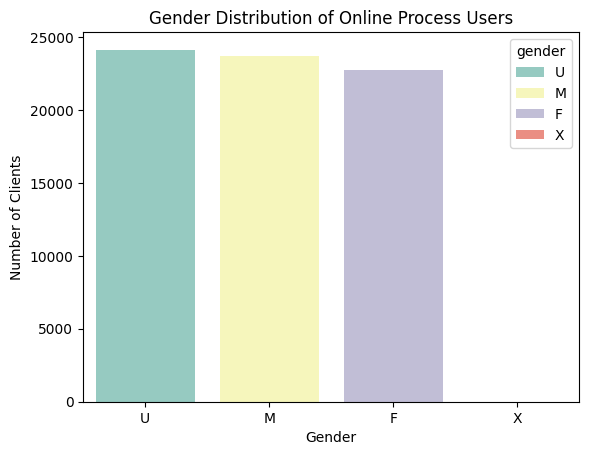

In [158]:
# Gender distribution bar chart (univariate analysis)
gender_counts = client_profile_df['gender'].value_counts()

print("Gender Distribution:")
print(gender_counts)


plt.xlabel("Gender")
plt.ylabel("Number of Clients")
plt.title("Gender Distribution of Online Process Users")
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Set3", hue=gender_counts.index, legend=True);
plt.show()

Maximum number of clients fall under the Gender category Unisex, followed by Male, then Female and lastly X.

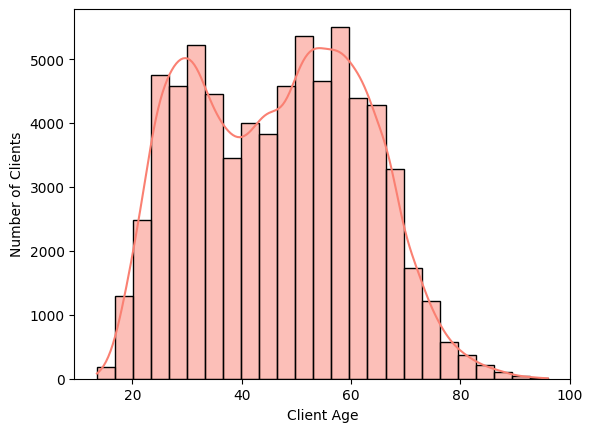

In [180]:
# histogram to show client age variations
plt.xlabel("Client Age")
plt.ylabel("Number of Clients")
sns.histplot(client_profile_df['clnt_age'],kde=True,bins=25,color='salmon')
plt.show()

After seeing the above histogram we can say that maximum number of clients fall under the age group of 50-53 followed by 60-63, and later by age 30.
So, seeing the total number of clients along different age groups in the above histogram, we can say our primary clients fall under the older age group which is 55+.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15636\1044322082.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  client_count_by_tenure = client_profile_df.groupby(tenure_groups)['client_id'].count()


Client Count by Tenure Group:
clnt_tenure_yr
Decade         34395
2 Decades      26394
3 Decades       8769
4 Decades        962
>=5 Decades       74
Name: client_id, dtype: int64


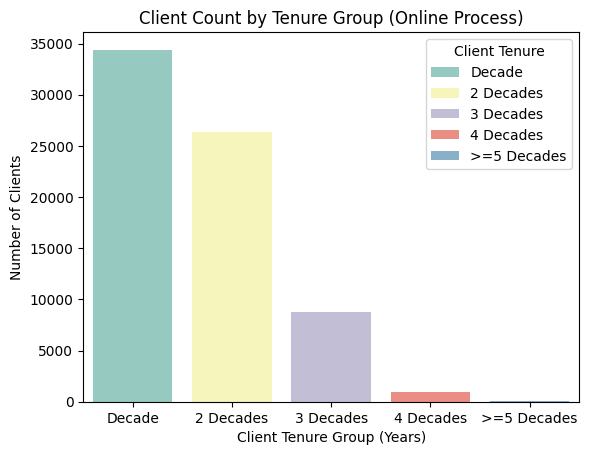

In [179]:
# We can further explore tenure by breaking it down into categories (e.g., tenure < 2 years, 2-5 years, etc.)
bins = [0, 10, 20, 30, 40, client_profile_df['clnt_tenure_yr'].max()]
labels = ['Decade','2 Decades','3 Decades','4 Decades','>=5 Decades']
tenure_groups = pd.cut(client_profile_df['clnt_tenure_yr'], bins=bins, labels=labels)  # Example tenure groups
client_count_by_tenure = client_profile_df.groupby(tenure_groups)['client_id'].count()
print("Client Count by Tenure Group:")
print(client_count_by_tenure)

# Plot client count by tenure group (univariate analysis)
plt.xlabel("Client Tenure Group (Years)")  # Adjust label based on bin ranges
plt.ylabel("Number of Clients")
plt.title("Client Count by Tenure Group (Online Process)")
sns.barplot(x=client_count_by_tenure.index, y=client_count_by_tenure.values, palette="Set3", hue=client_count_by_tenure.index, legend=True);
plt.legend(title='Client Tenure')
plt.show()

We can see the number of clients have increased in an exponential rate, 5 decades before there were 74 clients, but in the last decade we have 34K+ clients which is a very high increase in the number of clients. We have more newer clients.